===== DATASET =====
    Engine_Size  Mileage  Age  Horsepower  Price
0           1.2       90    8          80    3.5
1           1.5       70    6          95    5.0
2           1.8       60    5         110    6.0
3           2.0       50    4         130    8.0
4           2.2       40    3         150   10.0
5           1.3       85    7          85    4.0
6           1.6       65    6         100    5.5
7           2.4       30    2         180   14.0
8           2.0       45    4         140    9.0
9           1.4       80    7          90    4.5
10          1.7       55    5         115    6.5
11          2.5       25    1         200   16.0
12          1.8       50    3         125    8.5
13          2.2       35    2         160   12.0
14          1.5       75    6         105    5.2

===== BASIC INFO =====
       Engine_Size    Mileage        Age  Horsepower      Price
count    15.000000  15.000000  15.000000   15.000000  15.000000
mean      1.806667  57.000000   4.600000  12

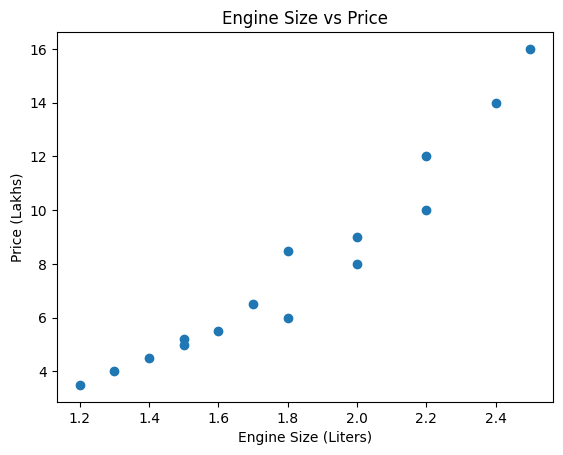

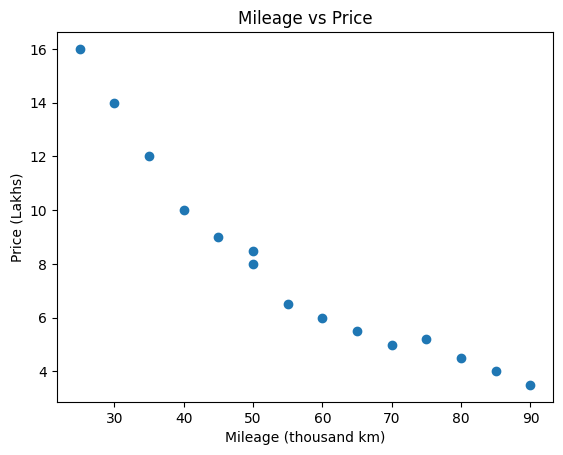

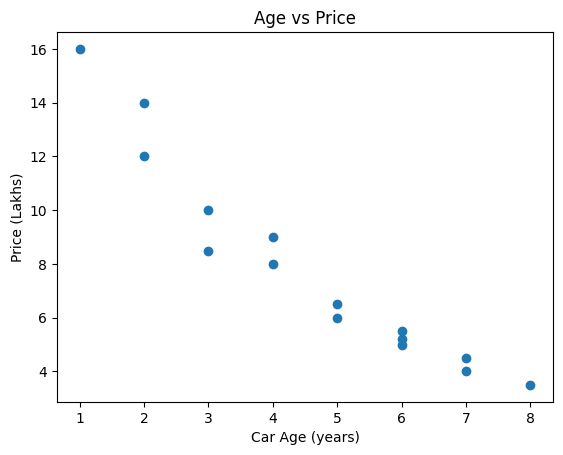

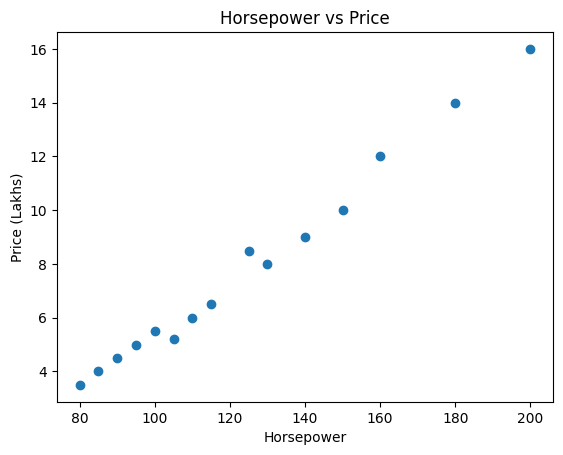


===== MODEL COEFFICIENTS =====
Intercept (b0): 0.24841323195327902
b1, b2, b3, b4: [-2.55064850e+00 -3.57689276e-04 -3.96609428e-01  1.12434570e-01]

===== MODEL PERFORMANCE =====
Mean Absolute Error: 0.3592589480272615
R2 Score: 0.9944693487104426

Predicted Price (Lakhs): 9.285422365431868


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
# MULTILINEAR REGRESSION + EDA
# Used Car Price Prediction


# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Create Dataset
data = {
"Engine_Size": [1.2,1.5,1.8,2.0,2.2,1.3,1.6,2.4,2.0,1.4,1.7,2.5,1.8,2.2,1.5],
"Mileage": [90,70,60,50,40,85,65,30,45,80,55,25,50,35,75],
"Age": [8,6,5,4,3,7,6,2,4,7,5,1,3,2,6],
"Horsepower": [80,95,110,130,150,85,100,180,140,90,115,200,125,160,105],
"Price": [3.5,5,6,8,10,4,5.5,14,9,4.5,6.5,16,8.5,12,5.2]
}

df = pd.DataFrame(data)

print("===== DATASET =====")
print(df)

print("\n===== BASIC INFO =====")
print(df.describe())

# Step 3: EDA - Visualization (Matplotlib)


# Engine Size vs Price
plt.figure()
plt.scatter(df["Engine_Size"], df["Price"])
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size (Liters)")
plt.ylabel("Price (Lakhs)")
plt.show()

# Mileage vs Price
plt.figure()
plt.scatter(df["Mileage"], df["Price"])
plt.title("Mileage vs Price")
plt.xlabel("Mileage (thousand km)")
plt.ylabel("Price (Lakhs)")
plt.show()

# Age vs Price
plt.figure()
plt.scatter(df["Age"], df["Price"])
plt.title("Age vs Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Price (Lakhs)")
plt.show()

# Horsepower vs Price
plt.figure()
plt.scatter(df["Horsepower"], df["Price"])
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price (Lakhs)")
plt.show()


# Step 4: Prepare Data


X = df[["Engine_Size", "Mileage", "Age", "Horsepower"]]
y = df["Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Step 5: Train Multiple Linear Regression Model


model = LinearRegression()
model.fit(X_train, y_train)

print("\n===== MODEL COEFFICIENTS =====")
print("Intercept (b0):", model.intercept_)
print("b1, b2, b3, b4:", model.coef_)


# Step 6: Model Evaluation


y_pred = model.predict(X_test)

print("\n===== MODEL PERFORMANCE =====")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


# Step 7: Predict New Car Price


# Example Car:
# Engine = 2.0L, Mileage = 45k km, Age = 4 years, HP = 140
new_car = [[2.0, 45, 4, 140]]
predicted_price = model.predict(new_car)

print("\nPredicted Price (Lakhs):", predicted_price[0])